# ANOVA and Chi Square 

## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

### Assumptions of ANOVA

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


## One-way ANOVA

### Example

#### National Transportation Safety Board  (NTSB) examines the safety of compact cars, midsize cars and full-size cars. 

Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of  car at 5% level of significance.

* mean_pressure_ compact_car    =  [643, 655,702]
* mean_pressure_ midsize_car    =  [469, 427, 525]
* mean_pressure_ fullsize_car   =  [484, 456, 402]

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

/home/laurenpease18/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mean_pressure_compact_car    =  np.array([643, 655,702])
mean_pressure_midsize_car    =  np.array([469, 427, 525])
mean_pressure_fullsize_car   =  np.array([484, 456, 402])
print('Count, Mean and standard deviation of mean pressue exerted by compact car: %3d, %3.2f and %3.2f' % (len(mean_pressure_compact_car ), mean_pressure_compact_car .mean(),np.std(mean_pressure_compact_car ,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by midsize car: %3d, %3.2f and %3.2f' % (len(mean_pressure_midsize_car), mean_pressure_midsize_car.mean(),np.std(mean_pressure_midsize_car,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by full size car: %3d, %3.2f and %3.2f' % (len(mean_pressure_fullsize_car), mean_pressure_fullsize_car.mean(),np.std(mean_pressure_fullsize_car,ddof =1)))

Count, Mean and standard deviation of mean pressue exerted by compact car:   3, 666.67 and 31.18
Count, Mean and standard deviation of mean pressue exerted by midsize car:   3, 473.67 and 49.17
Count, Mean and standard deviation of mean pressue exerted by full size car:   3, 447.33 and 41.68


In [3]:
mean_pressure_df = pd.DataFrame()

df1            = pd.DataFrame({'Car_Type': 'C', 'Mean_Pressure':mean_pressure_compact_car})
df2            = pd.DataFrame({'Car_Type': 'M', 'Mean_Pressure':mean_pressure_midsize_car})
df3            = pd.DataFrame({'Car_Type': 'F', 'Mean_Pressure':mean_pressure_fullsize_car})

mean_pressure_df = mean_pressure_df.append(df1) 
mean_pressure_df = mean_pressure_df.append(df2) 
mean_pressure_df = mean_pressure_df.append(df3) 

### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

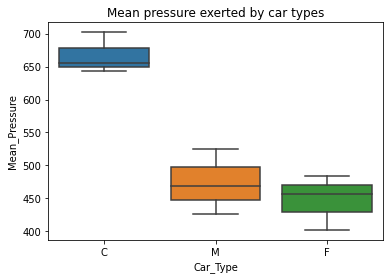

In [4]:
sns.boxplot(x = "Car_Type", y = "Mean_Pressure", data = mean_pressure_df)
plt.title('Mean pressure exerted by car types')
plt.show()

#### The boxplots show almost dissimilar shapes, location and spreads and there is no outlier.

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean pressure applied to the driver's head during crash test by Compact car, Midsize car and Full size car respectively.

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [5]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mean_Pressure ~ Car_Type', data = mean_pressure_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/home/laurenpease18/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


                sum_sq   df          F    PR(>F)
Car_Type  86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.001207 and it is less than our chosen level of signifance at 5%

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence  to reject the null hypothesis that at least one mean pressure of car is different from others .

### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different. 
* You have rejected the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_pressure_df['Mean_Pressure'], mean_pressure_df['Car_Type']))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     C      F -219.3333 0.0015 -322.7791 -115.8876   True
     C      M    -193.0  0.003 -296.4458  -89.5542   True
     F      M   26.3333 0.7172  -77.1124  129.7791  False
---------------------------------------------------------


#### Inference 

* Compact Car Vs Full-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Full-size cars.

* Compact Car Vs Mid-size cars: Since the result - reject is true, mean head pressure is statistically different between Compact and Mid-size cars.

* Full-size Car Vs Mid-size cars: Since the result - reject is false, mean head pressure is statistically equal to Full-size and Mid-size cars.

## Two-way ANOVA

### Example 

The table below shows the percentage of customers satisfied with the quality of service (QoS) offered by A1 Electronics Corporation Limited.

Conduct a two-way ANOVA and draw your inferences about the population means of QoS corresponding to the days as well as the stores.


In [7]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,79, 81, 74, 77, 66],\
           [2, 78, 86, 89, 97, 86], [3, 81, 87, 84, 94, 82], [4, 80, 83, 81, 88, 83], [5, 70, 74, 77, 89, 68]]

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       79       81       74       77       66
1    2       78       86       89       97       86
2    3       81       87       84       94       82
3    4       80       83       81       88       83
4    5       70       74       77       89       68


### Step 1: State the null and alternative hypothesis:

The null hypotheses for each of the sets are given below. 

* 1) The population means of the first factor (Day) are equal. 
* 2) The population means of the second factor (Store) are equal. 

Alternative Hypothesis:

* 1) The population means of the first factor (Day) are not equal. 
* 2) The population means of the second factor (Store) are not equal. 

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

##### Here we have five groups and five factors. There are two independent variables, Day and Store. 

##### Two-way ANOVA determines how a response (Quality of Servoce) is affected by two factors, Day and Store. 

##### Here we use 2-way ANOVA without replication since each cell has only one observation.

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [8]:
d0_val  = df1['Day'].values
d1_val  = df1['Store-A'].values
d2_val  = df1['Store-B'].values
d3_val  = df1['Store-C'].values
d4_val  = df1['Store-D'].values
d5_val  = df1['Store-E'].values

In [9]:
df1     = pd.DataFrame({'Day': d0_val, 'Store':'A', 'QoS': d1_val})
df2     = pd.DataFrame({'Day': d0_val, 'Store':'B', 'QoS': d2_val})
df3     = pd.DataFrame({'Day': d0_val, 'Store':'C', 'QoS': d3_val})
df4     = pd.DataFrame({'Day': d0_val, 'Store':'D', 'QoS': d4_val})
df5     = pd.DataFrame({'Day': d0_val, 'Store':'E', 'QoS': d5_val})

QoS_df  = pd.DataFrame()

QoS_df  = QoS_df.append(df1) 
QoS_df  = QoS_df.append(df2) 
QoS_df  = QoS_df.append(df3) 
QoS_df  = QoS_df.append(df4) 
QoS_df  = QoS_df.append(df5) 


pd.DataFrame(QoS_df)

,Day,Store,QoS
0,1,A,79
1,2,A,78
2,3,A,81
3,4,A,80
4,5,A,70
0,1,B,81
1,2,B,86
2,3,B,87
3,4,B,83
4,5,B,74


In [10]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'QoS ~ C(Day) + C(Store)'
model = ols(formula, QoS_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

          sum_sq    df         F    PR(>F)
C(Day)    617.36   4.0  8.737051  0.000614
C(Store)  461.76   4.0  6.534956  0.002575
Residual  282.64  16.0       NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, 
* p value for Day is 0.000614 and < 0.05 so we reject the null hypothesis (1) and conclude that the Day is having an effect on Quality of Service.
* p value for Stores is 0.002575 and < 0.05 so we retain the null hypothesis (2) and conclude that the Stores is having an effect on Quality of Service.

#### We conclude that stores as well as days reveal different patterns in the level of QoS.

### Practice Exercise 2

## Try example 4 with the following values:

In [11]:
table2  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

## Chi Square

A chi-square distribution with k degrees of freedom is given by sum of squares of standard normal random variables $Z_1$, $Z_2$, ... $Z_k$ obtained by transforming normal standard variables $X_1$, $X_2$, ... $X_k$ with mean values $\mu_1$, $\mu_2$, ... $\mu_k$ and corresponding standard deviation $\sigma_1$, $\sigma_2$, ... $\sigma_k$

${\chi_k}^2$ = ${Z_1}^2$ + ${Z_2}^2$ + … + ${Z_k}^2$ 


The probability density function of f(x) = 

$\frac{x^{\frac{k}{2}-1}e^\frac{-x}{2}}{2^{\frac{k}{2}} \Gamma {\bigg(\frac{k}{2}\bigg)}}$ if x > 0 else 0

where Γ(k/2) is a gamma function given by


$\Gamma\frac{k}{2}$ = ${\int_0}^\infty x^{k-1} e^{-x} dx$

### Properties of Chi Square distribution

##### 1. The mean and standard deviation of a chi-square distribution are k and √2k respectively, where k is the degrees of freedom.
##### 2. As the degrees of freedom increases, the probability density function of a chi-square distribution approaches normal distribution.
##### 3. Chi-square goodness of fit is one of the popular tests for checking whether a data follows a specific probability distribution.
##### 4. Chi square test is a right tailed test.

### Chi-square Goodness of fit tests

Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution pf data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

| Hypothesis | Description                                                           |
| ----------- | -------------------------------------------------------------------- |
| Null hypothesis | There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |
| Alternative hypothesis | There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |


### Chi-square Goodness of fit tests

Chi-square statistic for goodness of fit is given by 

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5.

###  Example 5

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: Meal preference is as per the perceived ratios of the operations manager
                        
Alternative hypothesis: $H_A$: Meal preference is different from the perceived ratios of the operations manager

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

Since we have observed frequencies of meal preference and we can calculate the expected frequencies, we can use chi-square goodness of fit for this problem.

### Step 4: Calculate p value or chi-square statistic value

Use the scipy.stats.chisquare function to compute Chi square goodness of fit by giving the observed values and expected values as input.

The first value in the returned tuple is the χ2 value itself, while the second value is the p-value computed using 
ν = k−1 where k is the number of values in each array.

We can calculate the expected frquency as follows:
1. Compute the total number of passengers. It will be 500.
2. We expect 30% of them prefer Vegan food, so the expected frequency for Vegan Food is = 0.3 * 500 = 150
3. Similarly we can calculate the expected frequencies of the rest of them.

In [12]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()

expected_values    = scipy.array([n*0.3, n*.45, n*0.2, n*0.05])

chi_square_stat, p_value = stats.chisquare(observed_values, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.7f' %('%', p_value))

At 5 % level of significance, the p-value is 0.0000449


/home/laurenpease18/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  after removing the cwd from sys.path.
/home/laurenpease18/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  import sys


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.0000449 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that Meal preference is not defined in the null hypothesis.

### Practice Exercise 3

Refer to the above example 5. Here the operations manager changes his belief and now believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table. 

scipy.stats.chi2_contingency is the Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.

### Example 6 

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:

Null hypothesis: $H_0$: There is no difference in quality of the products manufactured by male and female
                        
Alternative hypothesis: $H_A$: There is a significant difference in quality of the products manufactured by male and female

### Step 2: Decide the significance level

Here we select α = 0.05

### Step 3: Identify the test statistic

We use the chi-square test of independence to find out the difference of categorical variables 

### Step 4: Calculate p value or chi-square statistic value

In [13]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[138, 83, 64],[64, 67, 84]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 22.15247 P value 0.000015 Degrees of freedom 2


### Step 5: Decide to reject or accept null hypothesis

### In this example, p value is 0.000015 and < 0.05 so we reject the null hypothesis. 
### So, we conclude that there is a significant difference in quality of the products manufactured by male and female.